In [3]:
%matplotlib inline
from typing import NamedTuple, Optional
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from visualise import visualise
import csv

# Task 1

* a. For the following values of 𝑥, please calculate the values of the logistic sigmoid: 0, −1, 1, −10, 10, −1000, 1000
* b. Create a sigmoid function implementation that works for all the values above.
* c. (Optional) Your implementation should avoid any overflows during calculation.

In [4]:
def sigmoid(h):
    sigma1, sigma2 = [], []
    for i in range (len(h)):
        sigma1.append(1/(1+np.eX_train_train_train_train_train_train_trainp(-h[i])))
        sigma2.append(np.exp(h[i])/(1+np.exp(h[i])))
    return sigma1, sigma2

sigmoid_test_values = np.array([0., -1, 1, -10, 10, -1000, 1000])
sigma1,sigma2 = sigmoid(sigmoid_test_values)
for i in range(len(sigmoid_test_values)):
    print(f"Result for {sigmoid_test_values[i]:0.3}: \t {sigma1[i]:0.3} \t {sigma2[i]:0.3}")

Result for 0.0: 	 0.5 	 0.5
Result for -1.0: 	 0.269 	 0.269
Result for 1.0: 	 0.731 	 0.731
Result for -10.0: 	 4.54e-05 	 4.54e-05
Result for 10.0: 	 1.0 	 1.0
Result for -1e+03: 	 0.0 	 0.0
Result for 1e+03: 	 1.0 	 nan


C:\Users\user\AppData\Local\Temp\ipykernel_7484\2916533470.py:4: RuntimeWarning: overflow encountered in exp
  sigma1.append(1/(1+np.exp(-h[i])))
C:\Users\user\AppData\Local\Temp\ipykernel_7484\2916533470.py:5: RuntimeWarning: overflow encountered in exp
  sigma2.append(np.exp(h[i])/(1+np.exp(h[i])))
C:\Users\user\AppData\Local\Temp\ipykernel_7484\2916533470.py:5: RuntimeWarning: invalid value encountered in scalar divide
  sigma2.append(np.exp(h[i])/(1+np.exp(h[i])))


The error is due to a numerical overflow when calculating the exponential of very large or very negative values of `h`. Specifically, for eX_train_traintremely large values of `h`, the exponential of these values exceeds the numerical range supported by the system, leading to an overflow error.

To avoid these errors, we can utilize a numerically stable version of the sigmoid function by exploiting the mathematical identity:

$$
\sigma(x) = \frac{1}{1 + e^{-x}} = \frac{e^x}{e^x + 1}
$$

By using this identity, we can prevent overflow errors by computing the exponential of smaller values of `h` rather than calculating the exponential of very large values. Here's what I corrected:

This implementation avoids overflow errors by computing the exponential of `h` or `-h` depending on the value of `h`. This ensures that the exponential is computed for numerically smaller values, thus preventing overflow errors.

In [5]:
def sigmoid(h):
    if h >= 0.0: return 1 / (1 + np.exp(-h))
    else: return np.exp(h) / (1 + np.exp(h))

# Test de la fonction sigmoid avec différentes valeurs
for i in (0., -1, 1, -10, 10, -1000, 1000):
    sigma = sigmoid(i)
    print(f"Résultat pour {i}: \t {sigma:0.3}")

Résultat pour 0.0: 	 0.5
Résultat pour -1: 	 0.269
Résultat pour 1: 	 0.731
Résultat pour -10: 	 4.54e-05
Résultat pour 10: 	 1.0
Résultat pour -1000: 	 0.0
Résultat pour 1000: 	 1.0


# Logistic regression

Using the pla.npz and pocket.npz datasets from the previous lab, classify the samples using logistic regression.
Note that the class labels are −1 and 1, but the range of sigmoid is [0, 1], take care of transformations where needed

**a. Implement:**
* a **prediction function** for the logistic regression model, which calculates the probability that the given input belongs to the positive class,
* an **error function**, which calculates the cross-entropy error for the given input and output
* an **error gradient function**, which calculates the gradient with respect to the model parameters at the given input and output

In [30]:
def sigmoid(h):
   return 1 / (1 + np.exp(-h)) # Because sigmoid is [0, 1]

def predict_proba(X, weights):
    """Predict the probability that the given input belongs to the positive class."""
    return sigmoid(X @ weights)

def cross_entropy_error(y_pred, y_true):
    """
    Calculate the cross-entropy error for the given predicted and true labels.
    y_pred : Predicted probabilities for each sample.
    y_true : True labels for each sample (0 or 1).
    """
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def error_gradient(X, y_true, y_pred):
    """Calculate the gradient of the error function with respect to the model parameters."""
    return np.dot(X.T, (y_pred - y_true)) / len(y_true)

def accuracy(X, Y):
    return np.mean(np.where(predict_proba(X) >= 0.5, 1, -1) == Y)
    

**predict_proba** 

Calculates the dot product of the input features (X) and the model weights (weights), which gives us the linear combination of features. Then, we applies the sigmoid function (sigmoid) to the linear combination to obtain the probabilities.

**cross_entropy_error** 

Calculates the cross-entropy error between the true labels and the predicted probabilities. It prevents numerical instability by adding a small value (epsilon) to y_pred to avoid taking the logarithm of zero.
When the predicted probabilities are close to 0, taking the logarithm of these values may lead to numerical underflow, causing the computation to become inaccurate or even result in NaN (Not a Number) values. Similarly, when the predicted probabilities are close to 1, taking the logarithm of values very close to 1 may also lead to numerical instability.
By adding a small epsilon value, we ensure that the predicted probabilities are bounded away from 0 and 1, preventing these numerical instability issues. The value of epsilon used (e.g., 1e-15) is chosen to be small enough to avoid affecting the accuracy of the computation significantly while providing numerical stability.

**error_gradient** 

Calculates the gradient of the error function with respect to the model parameters (weights) using the formula for the gradient of the cross-entropy loss. It computes the dot product of the transpose of the input features (X.T) and the difference between the predicted probabilities and the true labels (y_pred - y_true), then divides by the number of samples to obtain the average gradient.
During each iteration of gradient descent, the error gradient is computed using this function, and the model parameters are updated in the opposite direction of the gradient to minimize the error function.

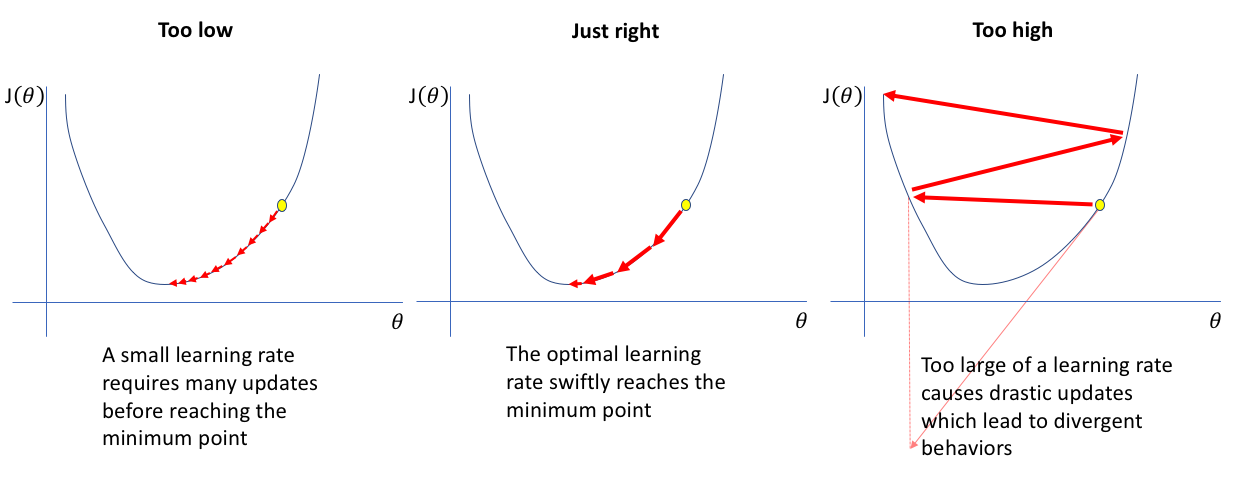

### Unit tests

In [31]:
data = np.load("../logreg.data/pla.npz")
x, y, x_test, y_test =  data["X"], data["Y"], data["X_test"],data["Y_test"]
N, d = x.shape
w = np.zeros(d)

train_probabilities = predict_proba(x, w)
print("Train probability:", train_probabilities)

train_error = cross_entropy_error(y, train_probabilities)
print("Cross-entropy error for training data:", train_error)

grad = error_gradient(x, train_probabilities, y)
print("Gradient:", grad)

Train probability: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Cross-entropy error for training data: 17.269604088761493
Gradient: [ 1.83819356 -0.45243646]


**b. Using the functions implemented above, write a full batch gradient descent training algorithm. In each iteration, calculate the mean error on the training dataset, calculate its gradient and update your parameter vector using a properly chosen step size.**

In [32]:
def batch_gradient_descent(X_train, y_train, learning_rate, num_iterations):
    num_features = X_train.shape[1]
    weights = np.random.rand(num_features)

    for i in range(num_iterations):
        y_pred = predict_proba(X_train, weights)
        error = cross_entropy_error(y_pred, y_train)
        gradient = error_gradient(X_train, y_train, y_pred)
        weights -= learning_rate * gradient
        
        if i % 100 == 0: 
            print(f"Iteration {i}: Error = {error}")

    return weights

data_pla = np.load('../logreg.data/pla.npz')
data_pocket = np.load('../logreg.data/pocket.npz')

X_train_pla, Y_train_pla, X_test_pla, Y_test_pla = data_pla['X'], data_pla['Y'], data_pla['X_test'], data_pla['Y_test']
X_train_pocket, Y_train_pocket, X_test_pocket, Y_test_pocket = data_pocket['X'], data_pocket['Y'], data_pocket['X_test'], data_pocket['Y_test']

learning_rate_pla = 0.0002
learning_rate_pocket = 0.00016
num_iterations = 1000

print("pla")
weights_pla = batch_gradient_descent(X_train_pla, Y_train_pla, learning_rate_pla, num_iterations)
print("\npocket")
weights_pocket = batch_gradient_descent(X_train_pocket, Y_train_pocket, learning_rate_pocket, num_iterations)

pla
Iteration 0: Error = 0.7080880681573046
Iteration 100: Error = 0.6611665005385148
Iteration 200: Error = 0.6153095796978125
Iteration 300: Error = 0.5704857624082712
Iteration 400: Error = 0.5266642708327717
Iteration 500: Error = 0.4838150515335943
Iteration 600: Error = 0.44190873699973615
Iteration 700: Error = 0.40091661006646495
Iteration 800: Error = 0.36081057166513625
Iteration 900: Error = 0.3215631123440541

pocket
Iteration 0: Error = 0.1710929211714387
Iteration 100: Error = 0.14990453833697953
Iteration 200: Error = 0.12898713436505876
Iteration 300: Error = 0.10833481722713767
Iteration 400: Error = 0.08794174624053952
Iteration 500: Error = 0.06780213754246708
Iteration 600: Error = 0.047910269173019514
Iteration 700: Error = 0.028260485765358237
Iteration 800: Error = 0.008847202844648074
Iteration 900: Error = -0.010335089259524165


Thanks to a learning_rate_pla = 0.0002 and a learning_rate_pocket = 0.00016, the cross-entropy error decreases over iterations for both the PLA and Pocket datasets. This indicates that the logistic regression model is learning from the training data and improving its predictions over time.

**c. Visualise the linear separator in each iteration**

pla
Iteration 0: Error = 0.43001573835552653
Iteration 100: Error = 0.0599972518881396
Iteration 200: Error = -0.24575185664623939
Iteration 300: Error = -0.5065142228995119
Iteration 400: Error = -0.7367810619180741
Iteration 500: Error = -0.9466729351113456
Iteration 600: Error = -1.1429336442408589
Iteration 700: Error = -1.3299599326754707
Iteration 800: Error = -1.5106107198365097
Iteration 900: Error = -1.6867629079933155


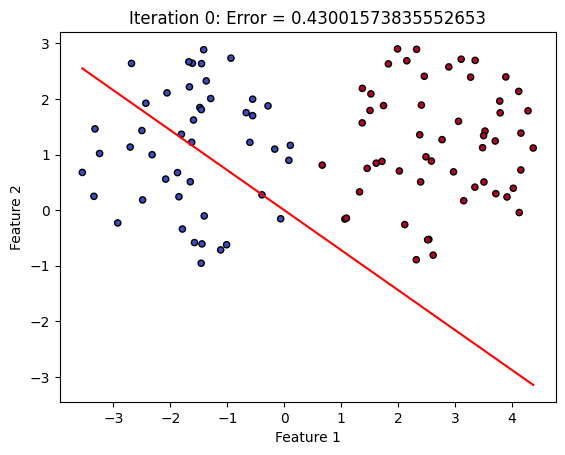

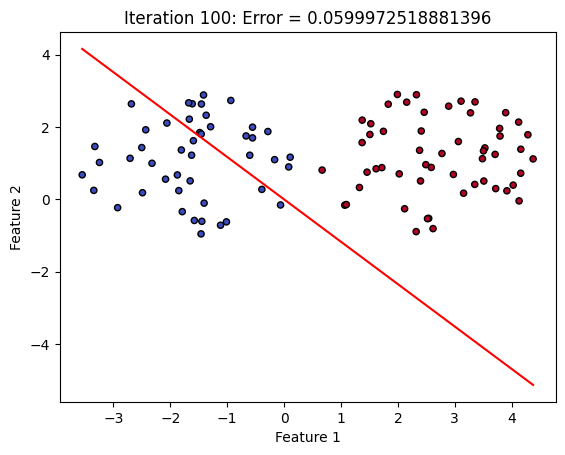

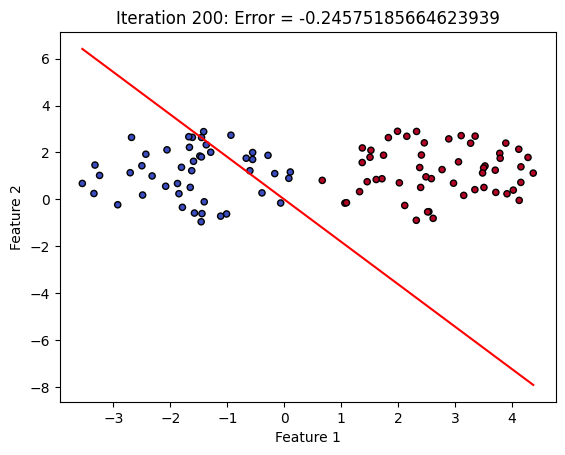

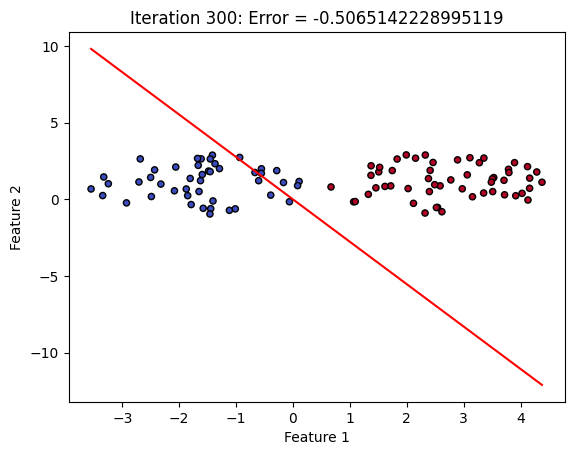

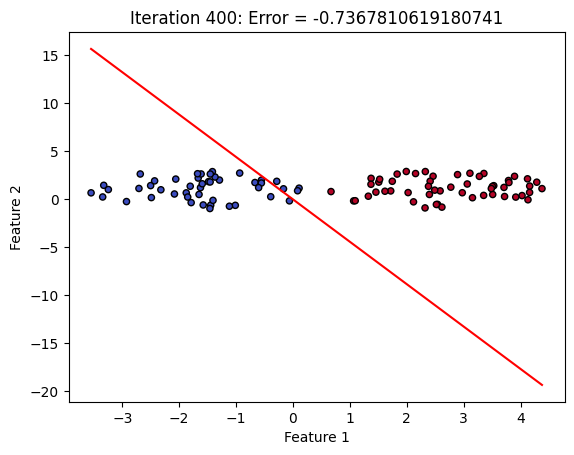

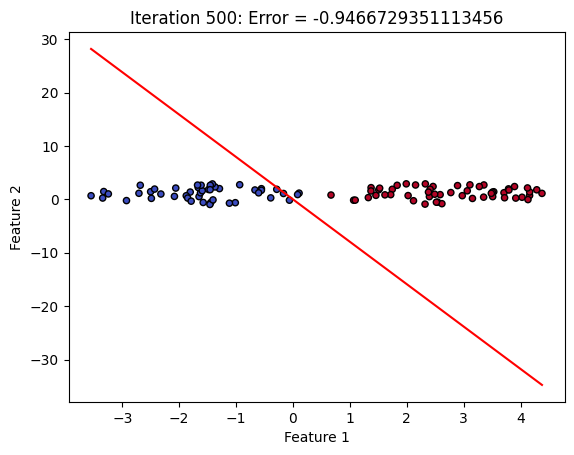

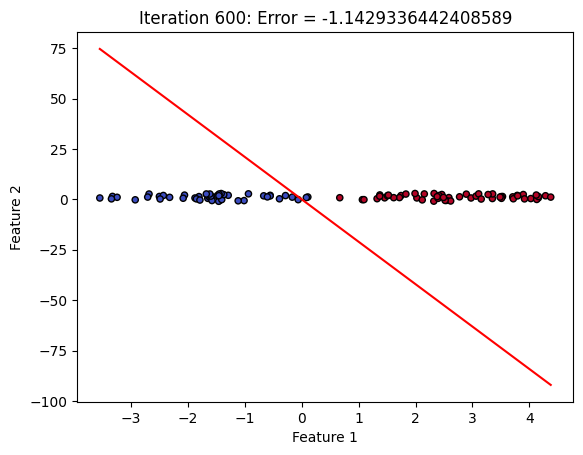

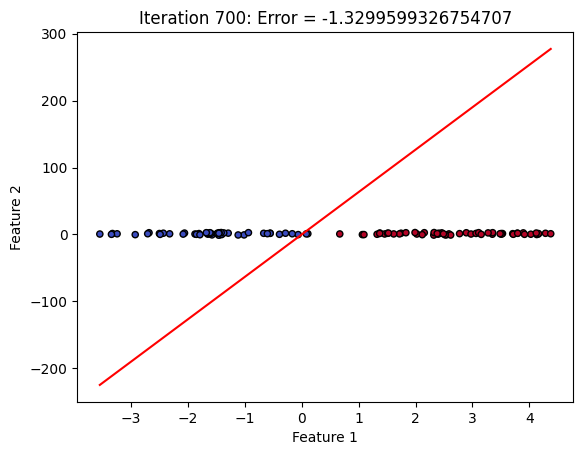

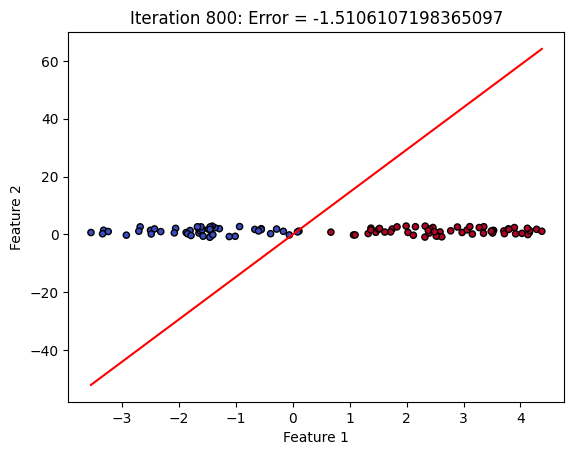

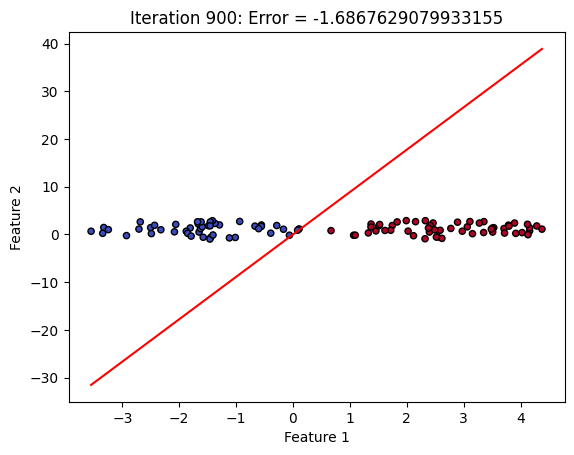

In [33]:
def batch_gradient_descent(X_train, y_train, learning_rate, num_iterations):
    num_features = X_train.shape[1]
    weights = np.random.rand(num_features)

    for i in range(num_iterations):
        y_pred = predict_proba(X_train, weights)
        error = cross_entropy_error(y_pred, y_train)
        gradient = error_gradient(X_train, y_train, y_pred)
        weights -= learning_rate * gradient
        
        if i % 100 == 0: 
            print(f"Iteration {i}: Error = {error}")

            # Plot the data points
            plt.figure()
            plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.title(f"Iteration {i}: Error = {error}")

            # Plot the decision boundary
            plot_x = np.array([np.min(X_train[:, 0]), np.max(X_train[:, 0])])
            plot_y = (-1 / weights[1]) * (weights[0] * plot_x)
            plt.plot(plot_x, plot_y, '-r')
            #plt.show()

    return weights

data_pla = np.load('../logreg.data/pla.npz')
data_pocket = np.load('../logreg.data/pocket.npz')

X_train_pla, Y_train_pla, X_test_pla, Y_test_pla = data_pla['X'], data_pla['Y'], data_pla['X_test'], data_pla['Y_test']
X_train_pocket, Y_train_pocket, X_test_pocket, Y_test_pocket = data_pocket['X'], data_pocket['Y'], data_pocket['X_test'], data_pocket['Y_test']

learning_rate_pla = 0.002
learning_rate_pocket = 0.002
num_iterations = 1000

print("pla")
weights_pla = batch_gradient_descent(X_train_pla, Y_train_pla, learning_rate_pla, num_iterations)
#print("\npocket")
#weights_pocket = batch_gradient_descent(X_train_pocket, Y_train_pocket, learning_rate_pocket, num_iterations)

1. Batch gradient descent utilizes the entire dataset at each iteration to update the model weights. It shows a decrease in the error (loss) over the iterations, but the change in the separating line is not clearly visible at each iteration in the visualization.

2. Stochastic gradient descent uses a random sample at each iteration to update the model weights. It also shows a decrease in the error, but it is more likely to fluctuate due to the use of smaller data batches. The visualization of the separating line shows more frequent changes and may appear more unstable compared to batch gradient descent.

Batch gradient descent is more stable as it utilizes the entire dataset at each iteration, while stochastic gradient descent is faster to converge to a solution but may be more unstable due to the variability introduced by using small data batches. The choice between the two methods depends on computational constraints, dataset size, and the need for fast convergence.

Iteration 0: Error = -0.047145434056041345
Iteration 100: Error = -0.07829061965071138
Iteration 200: Error = -0.10890510833498
Iteration 300: Error = -0.13900632532277804
Iteration 400: Error = -0.1686113504028456
Iteration 500: Error = -0.19773690709105543
Iteration 600: Error = -0.22639935280530607
Iteration 700: Error = -0.2546146702212413
Iteration 800: Error = -0.2823984599037917
Iteration 900: Error = -0.309765934257898


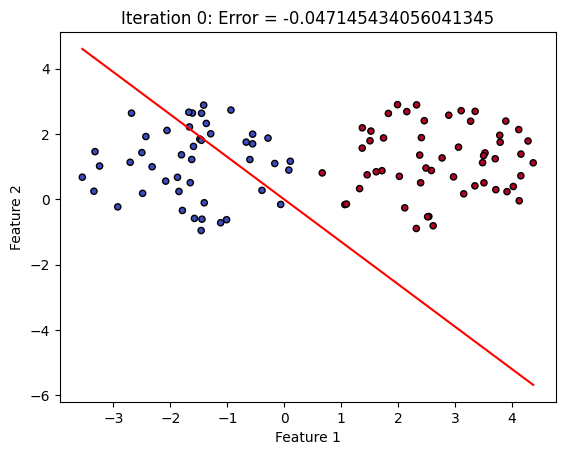

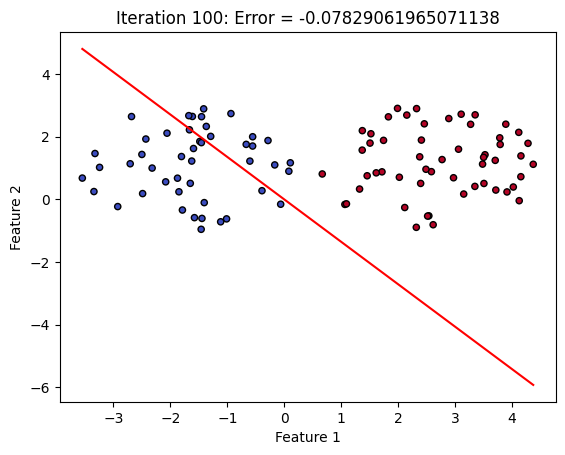

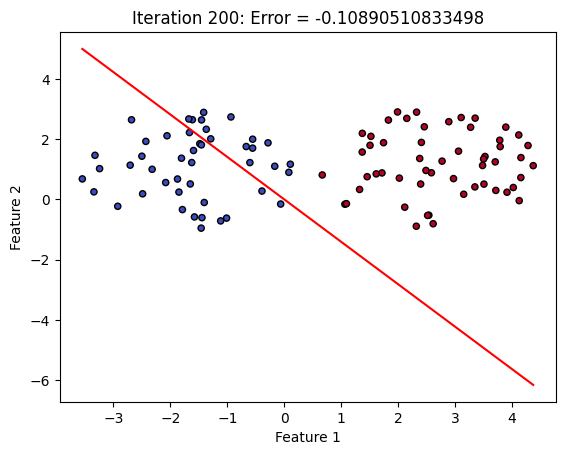

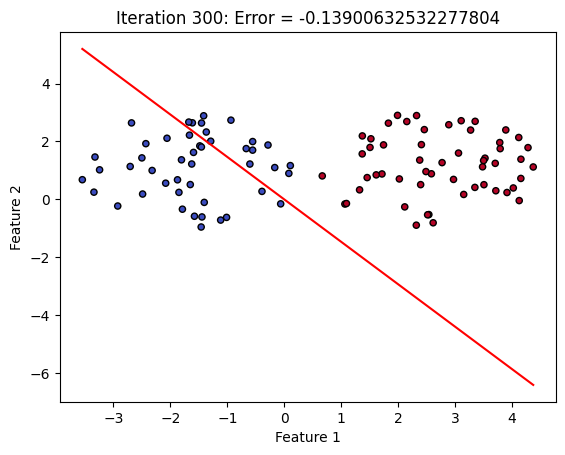

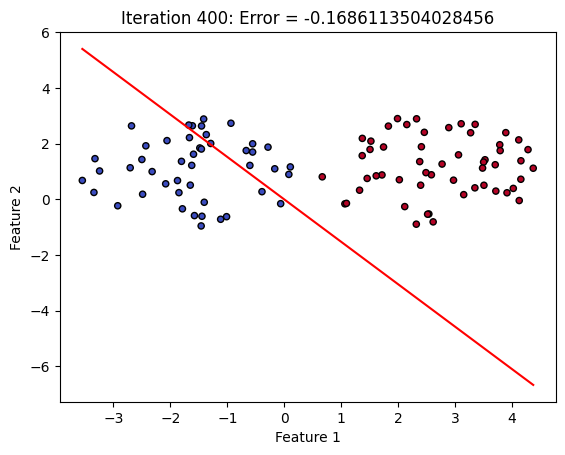

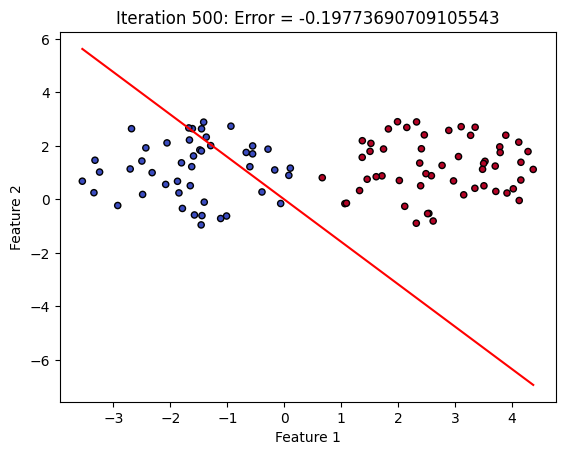

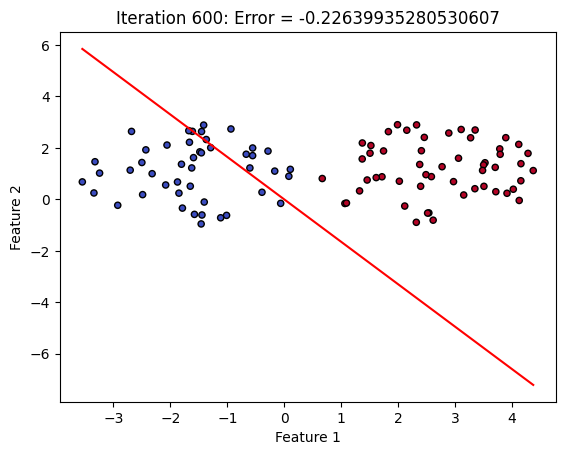

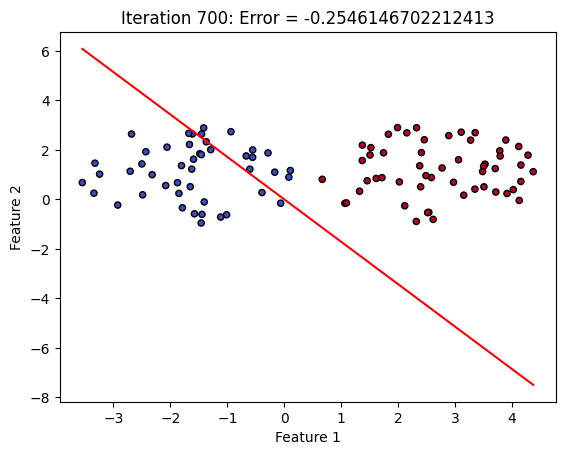

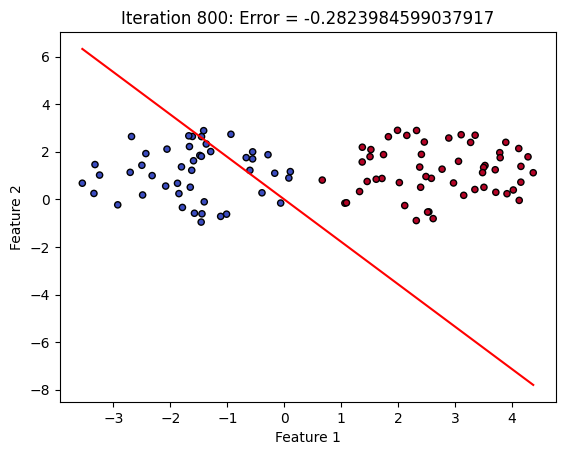

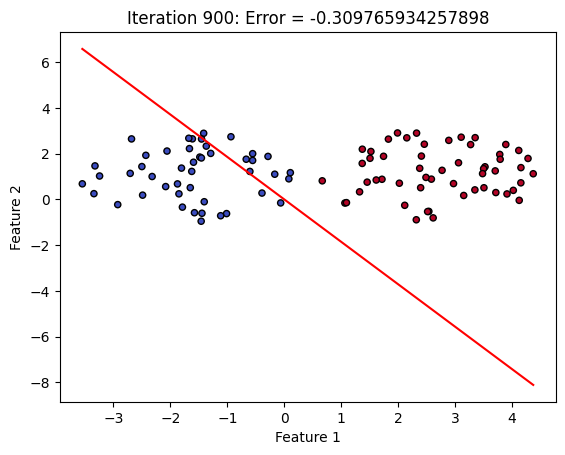

In [34]:
def stochastic_gradient_descent(X_train, y_train, learning_rate, num_iterations, batch_size=None):
    num_samples, num_features = X_train.shape
    weights = np.random.rand(num_features)

    if batch_size is None or batch_size >= num_samples:
        # Full batch descent
        batch_size = num_samples

    num_batches = num_samples // batch_size

    for i in range(num_iterations):
        # Shuffle the data before each epoch
        indices = np.random.permutation(num_samples)
        X_train_shuffled = X_train[indices]
        y_train_shuffled = y_train[indices]

        for j in range(num_batches):
            # Select batch
            start = j * batch_size
            end = min((j + 1) * batch_size, num_samples)
            X_batch = X_train_shuffled[start:end]
            y_batch = y_train_shuffled[start:end]

            y_pred = predict_proba(X_batch, weights)
            error = cross_entropy_error(y_pred, y_batch)
            gradient = error_gradient(X_batch, y_batch, y_pred)
            weights -= learning_rate * gradient

        if i % 100 == 0:
            print(f"Iteration {i}: Error = {error}")
            
            # Plot the data points
            plt.figure()
            plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.title(f"Iteration {i}: Error = {error}")

            # Plot the decision boundary
            plot_x = np.array([np.min(X_train[:, 0]), np.max(X_train[:, 0])])
            plot_y = (-1 / weights[1]) * (weights[0] * plot_x)
            plt.plot(plot_x, plot_y, '-r')
            #plt.show()

    return weights


data_pla = np.load('../logreg.data/pla.npz')
X_train_pla, Y_train_pla, X_test_pla, Y_test_pla = data_pla['X'], data_pla['Y'], data_pla['X_test'], data_pla['Y_test']

learning_rate = 0.0002
num_iterations = 1000
batch_size = None  # Specify the batch size

weights_pla_sgd = stochastic_gradient_descent(X_train_pla, Y_train_pla, learning_rate, num_iterations, batch_size)


**e. In addition, in a separate subplot plot each of the training samples transformed into the score space (ie. just before the sigmoid) and a logistic sigmoid function as reference**

This means a plot where the horizontal axis is the score $s=\omega^Tx$ and the vertical axis is $y$. You will have two plots: one is the logistic sigmoid function, calculated analytically,
and the other is the ground truth $ys$ versus the score $s=\omega^Tx$.

Iteration 100: Error = 22.09455960246524


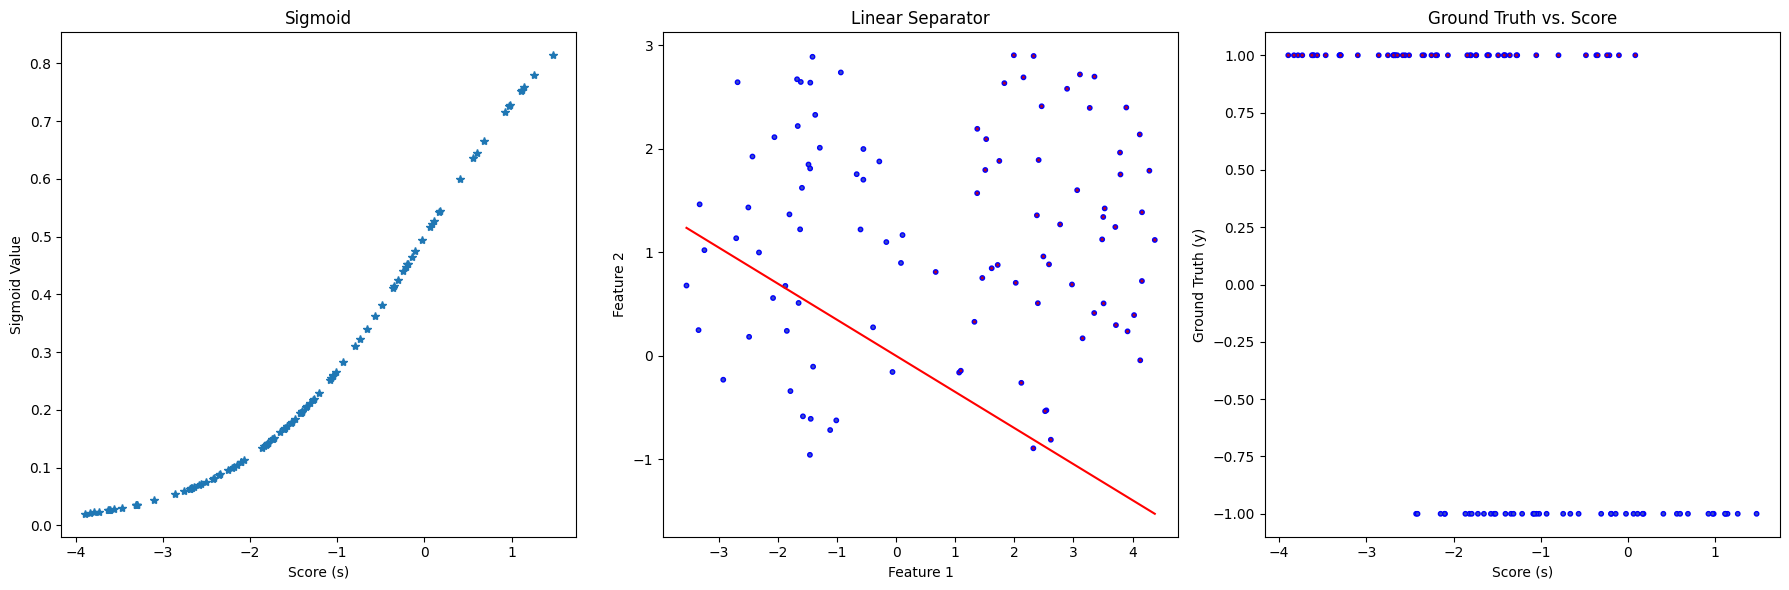

Iteration 200: Error = 22.5484700152509


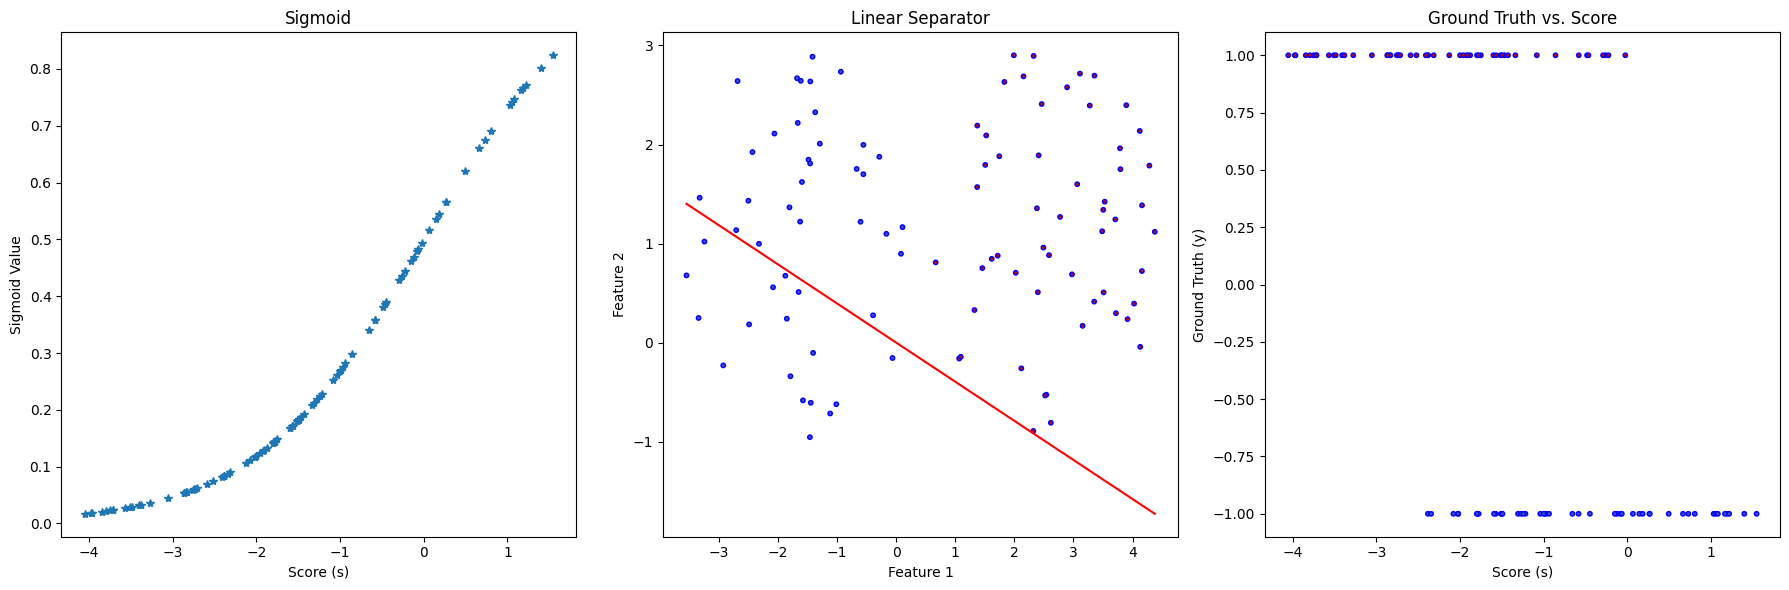

Iteration 300: Error = 22.989449903459764


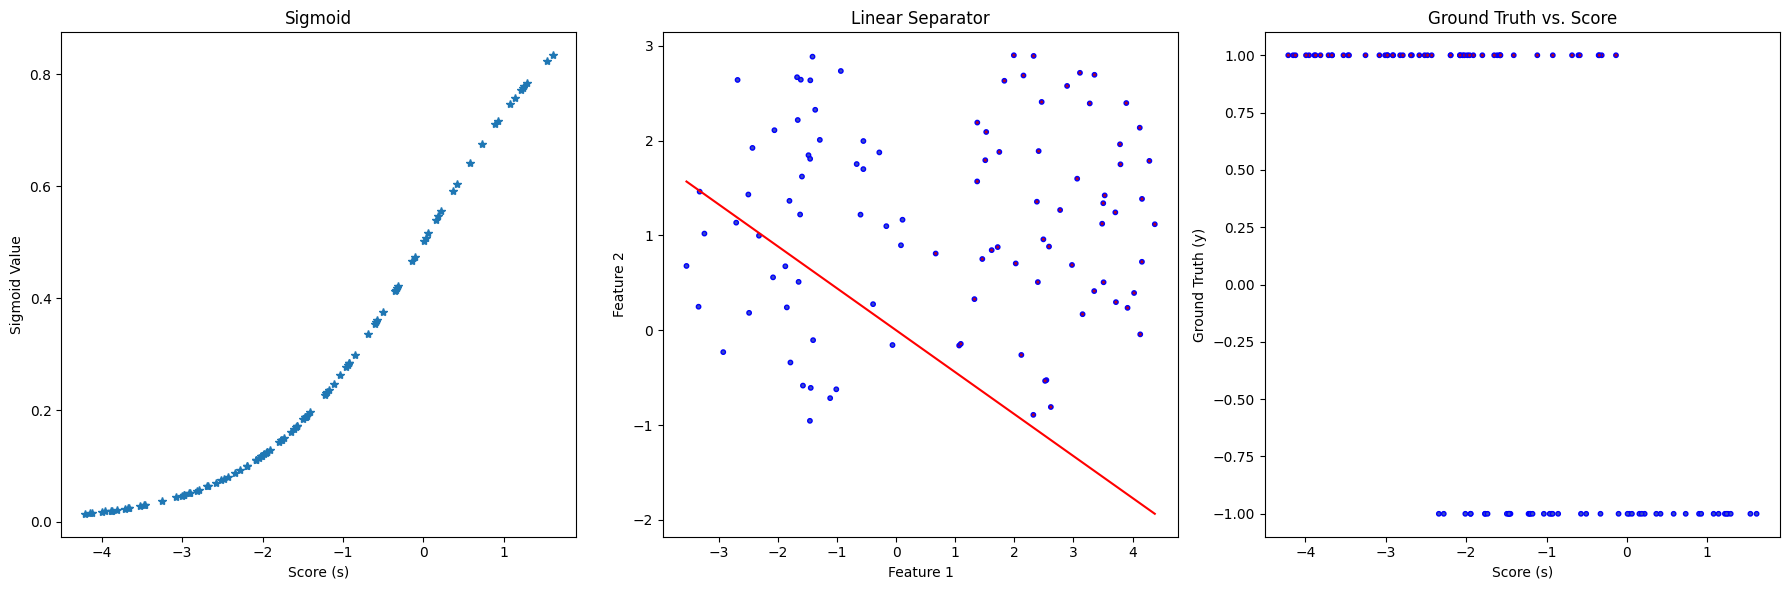

Iteration 400: Error = 23.41701289521404


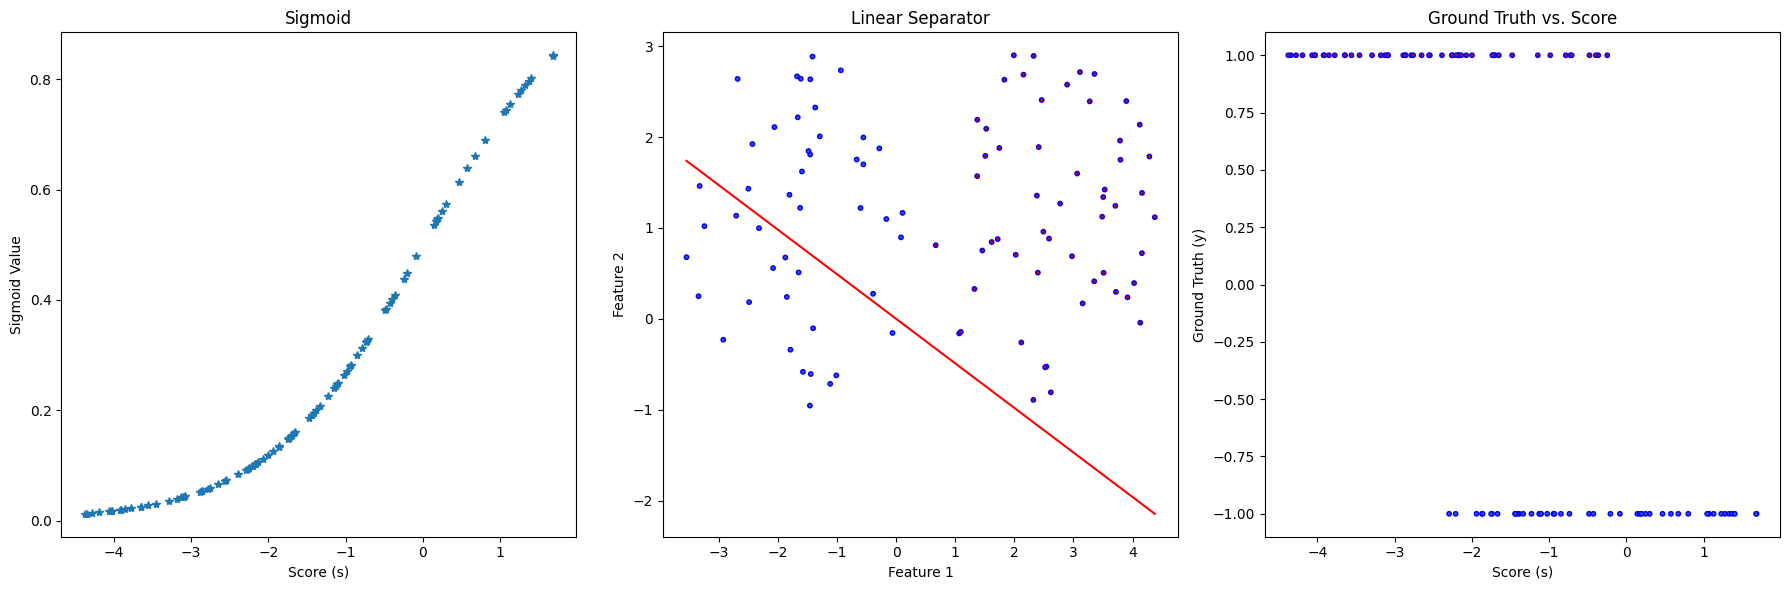

Iteration 500: Error = 23.830838105707947


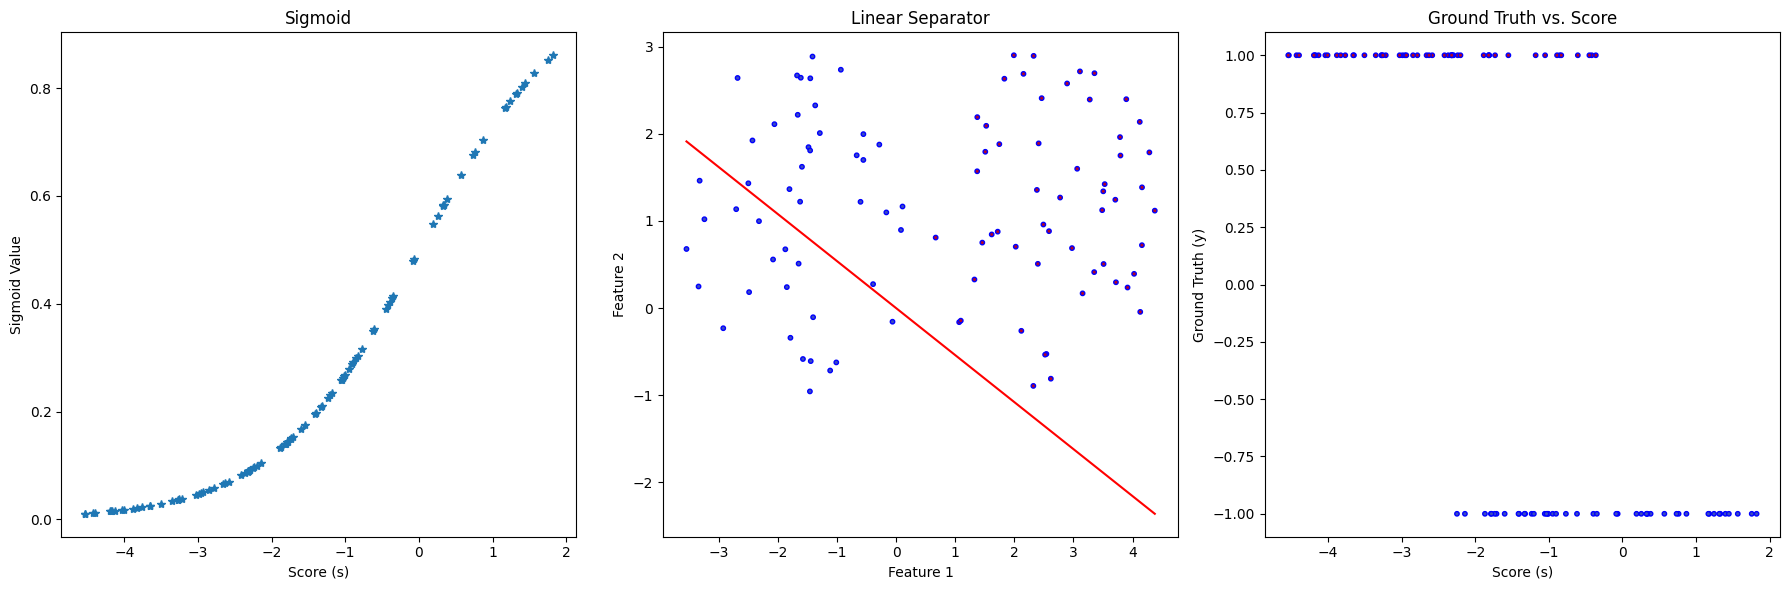

Iteration 600: Error = 24.23075142545009


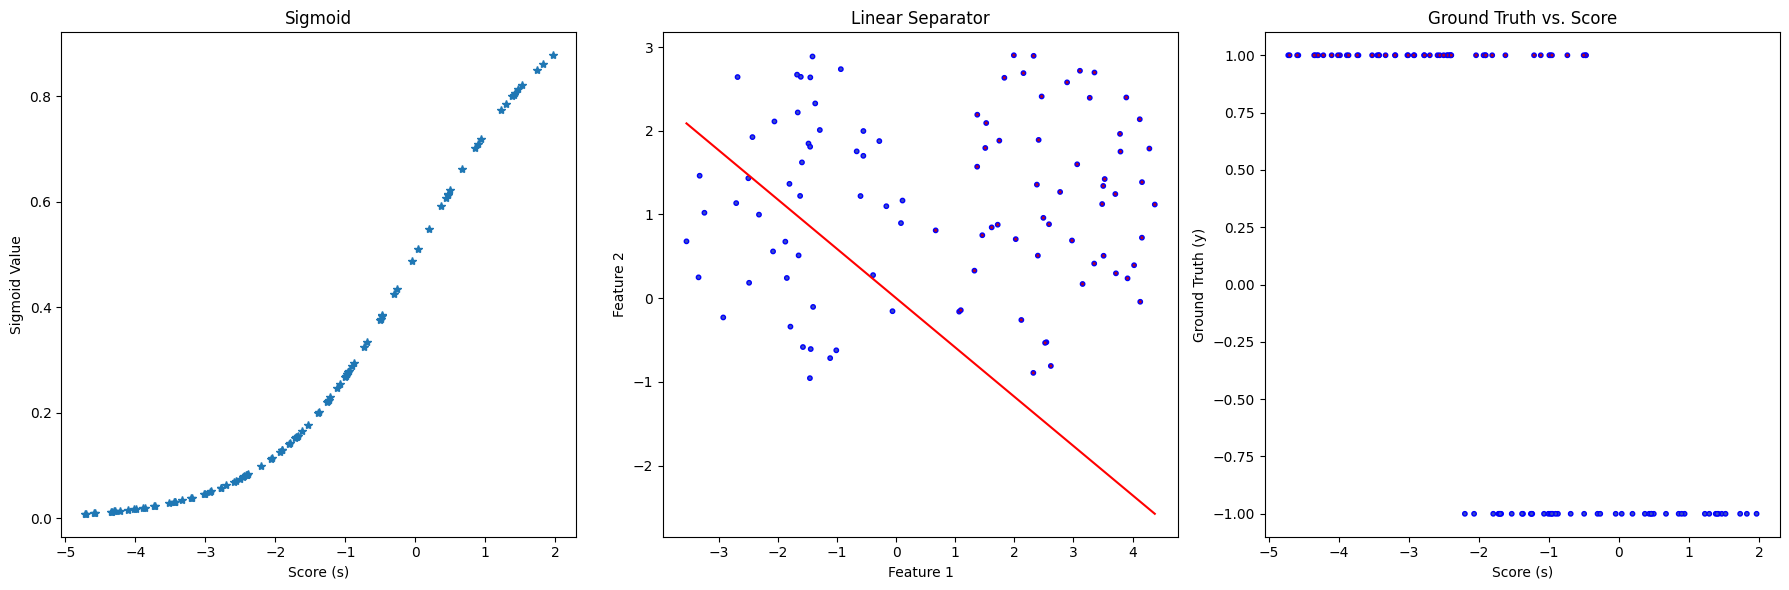

Iteration 700: Error = 24.616707512244812


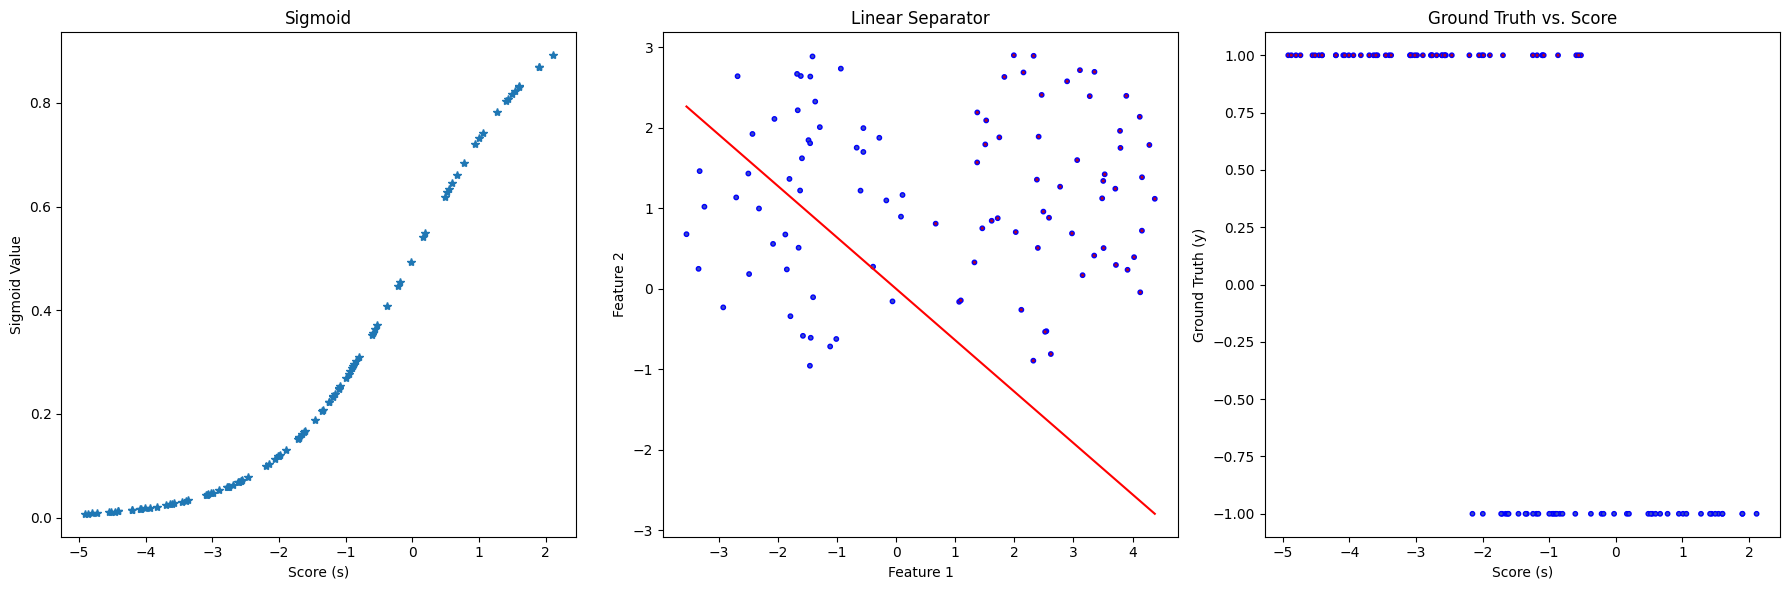

Iteration 800: Error = 24.98877258398906


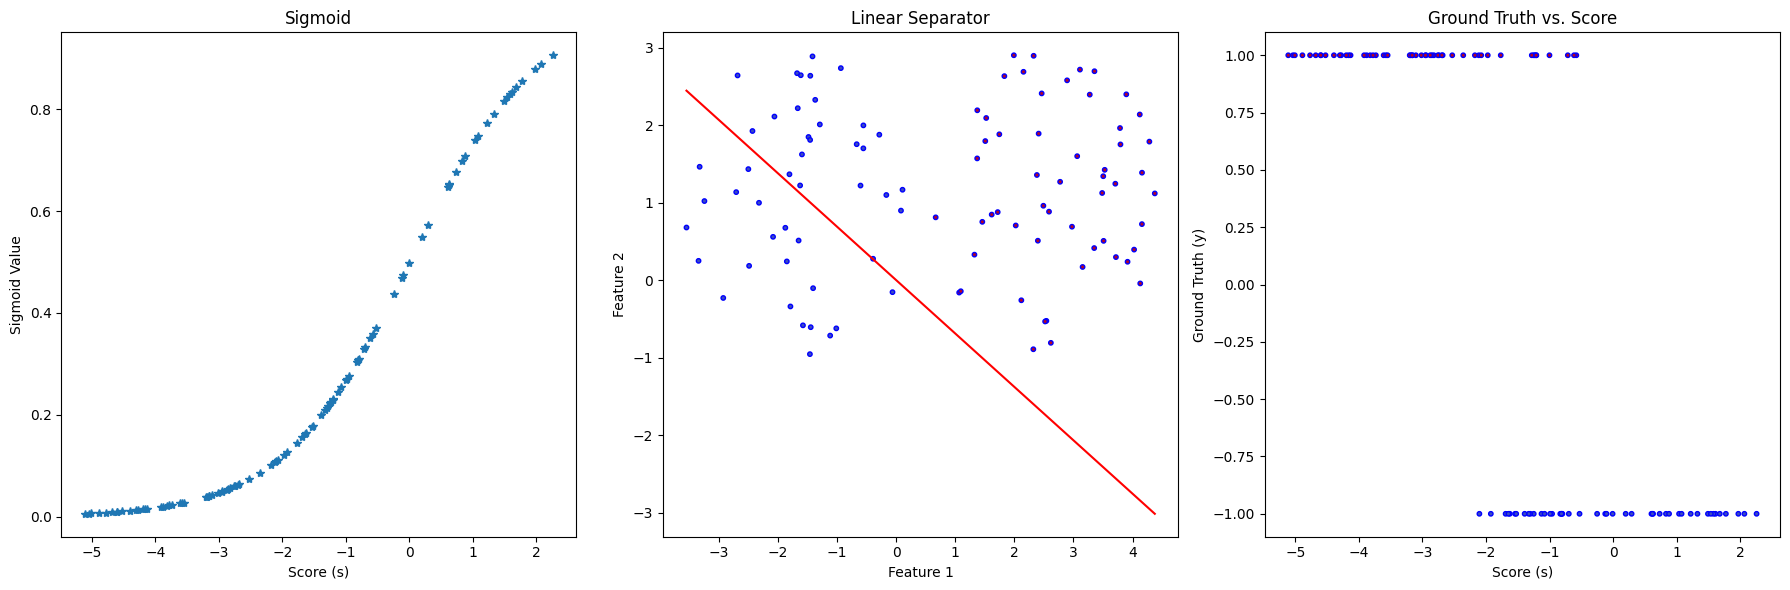

Iteration 900: Error = 25.347107758424325


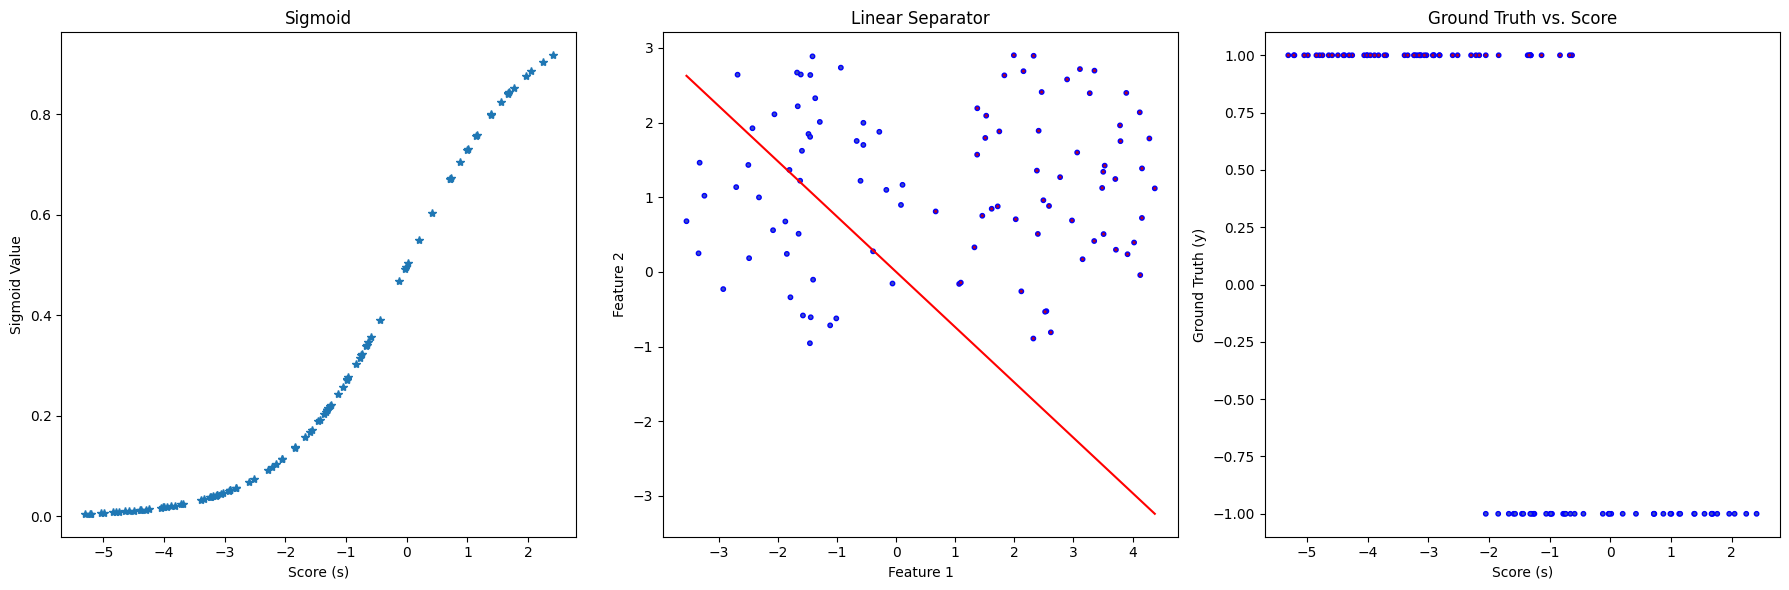

Iteration 1000: Error = 25.69195269332787


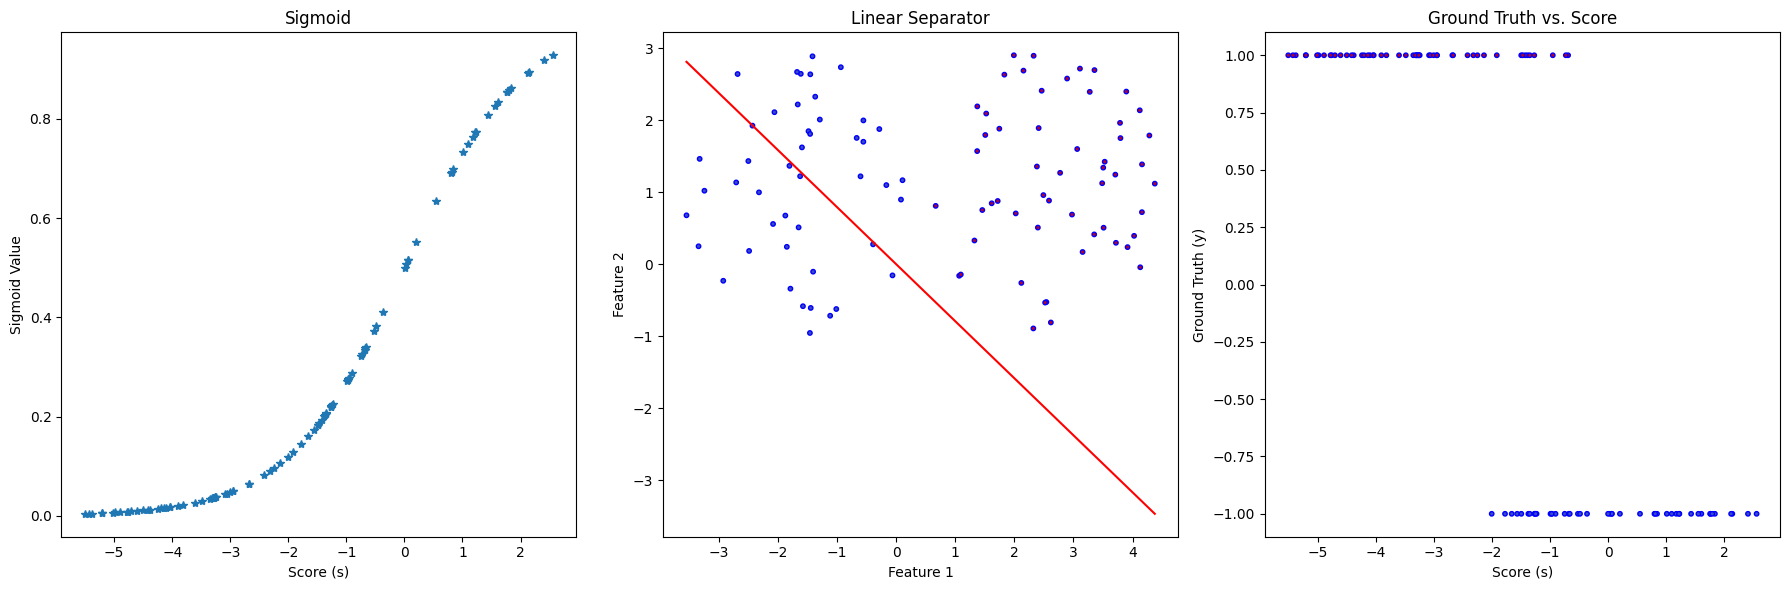

In [60]:
def stochastic_gradient_descent(X_train, y_train, learning_rate, num_iterations):

    w = np.random.randn(d)

    for i in range(num_iterations):
        train_probabilities = predict_proba(X_train, w)
        train_error = cross_entropy_error(y_train, train_probabilities)
        grad = error_gradient(X_train, train_probabilities, y_train)
        w -= learning_rate * grad

        if (i + 1) % 100 == 0:
            print(f"Iteration {i + 1}: Error = {train_error}")
            train_scores = np.dot(X_train, w)
            sigmoid_values = sigmoid(train_scores)
            plt.figure(figsize=(18, 6))
            
            plt.subplot(1, 3, 1)
            plt.plot(train_scores, sigmoid_values, '*')
            plt.title('Sigmoid')
            plt.xlabel('Score (s)')
            plt.ylabel('Sigmoid Value')

            plt.subplot(1, 3, 2)
            plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=10, edgecolors='b')
            plot_x = np.array([np.min(X_train[:, 0]), np.max(X_train[:, 0])])
            plot_y = (-1 / w[1]) * (w[0] * plot_x)
            plt.plot(plot_x, plot_y, '-r')
            plt.title('Linear Separator')
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')

            plt.subplot(1, 3, 3)
            plt.scatter(train_scores, y_train, c=y_train, cmap=plt.cm.coolwarm, s=10, edgecolors='b')
            plt.title('Ground Truth vs. Score')
            plt.xlabel('Score (s)')
            plt.ylabel('Ground Truth (y)')

            plt.tight_layout()
            plt.show()

    return w

data_pla = np.load('../logreg.data/pla.npz')
X_train_pla, Y_train_pla, X_test_pla, Y_test_pla = data_pla['X'], data_pla['Y'], data_pla['X_test'], data_pla['Y_test']

learning_rate = 0.0002
num_iterations = 1000

weights_pla_sgd = stochastic_gradient_descent(X_train_pla, Y_train_pla, learning_rate, num_iterations)
